### 統計學習與深度學習
### Homework 2
B07902034 資工三 王昱凱
### 第一題 [Data Preprocessing]

In [ ]:
import pickle
import numpy as np
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

print(adult50kp['x_train'][0])
print(adult50kp['columnname'])

In [2]:
with open('adult.data') as f:
    X_train = np.array([line.strip('\n').split(', ')[:-1] for line in f])
with open('adult.data') as f:
    Y_train = np.array([line.strip('\n').split(', ')[-1] for line in f])
X_train = X_train[:-1]
Y_train = Y_train[:-1]
    
i = 0
while i < len(X_train):
    if '?' in X_train[i]:
        X_train = np.delete(X_train, i, 0)
        Y_train = np.delete(Y_train, i)
        i = i-1
    i = i+1

Y_train = [1 if y == '>50K' else 0 for y in Y_train]

with open('adult.test') as f:
    next(f)
    X_test = np.array([line.strip('\n').split(', ')[:-1] for line in f])
with open('adult.test') as f:
    next(f)
    Y_test = np.array([line.strip('\n').split(', ')[-1] for line in f])
X_test = X_test[:-1]
Y_test = Y_test[:-1]

i = 0
while i < len(X_test):
    if '?' in X_test[i]:
        X_test = np.delete(X_test, i, 0)
        Y_test = np.delete(Y_test, i)
        i = i-1
    i = i+1

Y_test = [1 if y == '>50K.' else 0 for y in Y_test]


In [3]:
elems = ['y_train']

for aelem in elems:
    cnomatch = np.sum(adult50kp[aelem] != Y_train)
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)

y_train match!


### 第二題 [ROC and AUC]
#### Q2.1 基於adult50kp['y_test']與ypredprob繪製ROC Curve

Accuracy = 0.848340


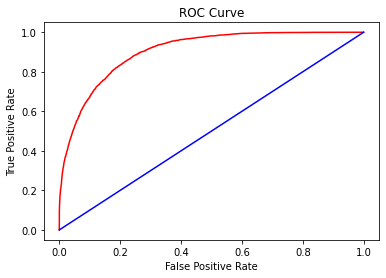

In [34]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
#train prediction model    
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])
#make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])
#compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk) 

# decide thresholds by sorted ypredprob
thresholds = np.sort(ypredprob[:, 1])[::-1]
thresholds = np.append(thresholds[0]+1, thresholds)
index = []
for i in range(len(thresholds)):
    if i % 5 != 0:
        index.append(i)
thresholds = np.delete(thresholds, index)

# compute fpr & tpr
fpr, tpr = [], []
for i in range(len(thresholds)):
    tp, fn, fp, tn = 0, 0, 0, 0
    for j in range(len(adult50kp['y_test'])):
        if adult50kp['y_test'][j] == 1:
            if ypredprob[j, 1] >= thresholds[i]:
                tp += 1
            else:
                fn += 1
        else:
            if ypredprob[j, 1] >= thresholds[i]:
                fp += 1
            else:
                tn += 1
    fpr.append(fp/(fp+tn))
    tpr.append(tp/(tp+fn))
    
# plot the roc curve
plt.plot(fpr, tpr, color='r')
plt.plot([0, 1], [0, 1], color='b')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()   

#### Q2.2 計算繪製出的ROC Curve的AUC

In [35]:
# compute auc base on roc curve
auc = 0
for i in range(len(thresholds)-1):
    auc += (tpr[i+1] + tpr[i]) * (fpr[i+1] - fpr[i]) / 2
print("AUC = ", auc)

AUC =  0.9034924462314518
